In [2]:
# For working with 2D array
import pygrib
import xarray as xr
from cdo import *   # python version
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cdo = Cdo()

from os import listdir
from os.path import isfile, join, getsize

ModuleNotFoundError: No module named 'pygrib'

In [1]:
#US_dir = '/media/joseph/902E97B32E979138/CONUS/'
US_dir = 'data/CONUS/'
files = sorted([join(US_dir,f) for f in listdir(US_dir) if getsize(join(US_dir,f)) > 1000])

def extract_ll():
    for lat in range(23,53):
        for lon in range(-127,-64):

            lonlat = '%d,%d,%d,%d'%(lon,lon+1,lat,lat+1) 

            for f in tqdm(files):
                cdo.sellonlatbox(lonlat, input=f, output='test.grb')

            return None

NameError: name 'listdir' is not defined

In [1]:
T2 = xr.open_dataset('data/dayavg_T2.nc')

NameError: name 'xr' is not defined

In [95]:
T2.load()

<xarray.Dataset>
Dimensions:  (lat: 117, lon: 249, time: 1162)
Coordinates:
  * time     (time) float64 2.014e+07 2.015e+07 2.015e+07 2.015e+07 ...
  * lon      (lon) float32 233.0 233.25 233.5 233.75 234.0 234.25 234.5 ...
  * lat      (lat) float32 52.0 51.75 51.5 51.25 51.0 50.75 50.5 50.25 50.0 ...
Data variables:
    T2M      (time, lat, lon) float32 260.30225 260.03955 259.81592 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.3 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Mon Jul 02 18:38:55 2018: cdo -t ecmwf -f nc4 -b 16 -k grid...
    institution:  European Centre for Medium-Range Weather Forecasts
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [114]:
lat = 42.3
lon = -71.0%360
test = T2.sel(lat=lat, lon = lon, method = 'nearest')

In [115]:
test.sel(time = slice(20150000,20160000))

<xarray.Dataset>
Dimensions:  (time: 365)
Coordinates:
  * time     (time) float64 2.015e+07 2.015e+07 2.015e+07 2.015e+07 ...
    lon      float32 289.0
    lat      float32 42.25
Data variables:
    T2M      (time) float32 269.45334 273.52438 271.2486 276.55746 276.1442 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.3 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Mon Jul 02 18:38:55 2018: cdo -t ecmwf -f nc4 -b 16 -k grid...
    institution:  European Centre for Medium-Range Weather Forecasts
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [1]:
time = np.array(test.time)

NameError: name 'np' is not defined

In [105]:
time = time.astype(int)
time = time.astype(str)

In [106]:
time = pd.to_datetime(time)

In [119]:
test.T2M

<xarray.DataArray 'T2M' (time: 1162)>
array([269.23486, 269.45334, 273.52438, ..., 276.6853 , 275.08405, 274.52563],
      dtype=float32)
Coordinates:
  * time     (time) float64 2.014e+07 2.015e+07 2.015e+07 2.015e+07 ...
    lon      float32 289.0
    lat      float32 42.25
Attributes:
    long_name:  2 metre temperature
    units:      K
    code:       167
    table:      128

In [107]:
test['dt'] = time

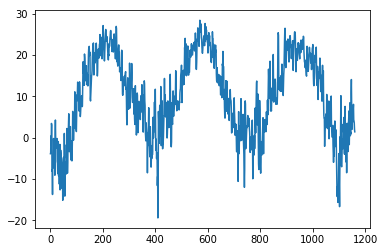

In [103]:
plt.plot(test.T2M - 273.15)

In [94]:
T2.lon%360

<xarray.DataArray 'lon' (lon: 249)>
array([0.647222, 0.647917, 0.648611, ..., 0.818056, 0.81875 , 0.819444],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 233.0 233.25 233.5 233.75 234.0 234.25 234.5 ...

In [101]:
-1%360

359